In [1]:
from generate_dataset_class import potassium_channel_dataset_genaerator
import numpy as np
import os

M_ha = 2
M_hb = 5
V_2ha = -40
V_2hb = -35
s_ha = 6
s_hb = -10
X_h = [M_ha, M_hb, V_2ha, V_2hb, s_ha, s_hb]

param_bounds_wo_h = {'g_max': [100.0, 140.0],
                'E_rev': [-100, -80],

                'M_ma': [0, 50],
                'M_mb': [0, 50],
                'V_2ma': [-60, 60],
                #'V_2ma': [10, 100],
                'V_2mb': [-60, 60],
                's_ma': [-50, -0.5],  # excluding small abs values to avoid operating error in exp
                's_mb': [0.5, 50]}

input = {'p': 4,
         'q': 0,
        'step_Vs': np.array([0.00, 10.00, 20.00, 30.00, 40.00, 50.00, 60.00, 70.00, 80.00]), # mV
        'prestep_Vs': np.array([-80, -50, -20]),
        'step_V': 80,
        'prestep_V': -100,  #mV
        'end_time': 120,
        'time_step': 0.01,
        'X_h': X_h,
        'param_bounds_wo_h': param_bounds_wo_h}

dataset_generator = potassium_channel_dataset_genaerator(input)

In [2]:
iter = 1

for i in range(iter): 
    dataset_generator.generate_data(1000)
    dataset_generator.find_illed_samples()
    dataset_generator.find_small_current_samples()
    dataset_generator.delete_illed_small_samples()
    # dataset_generator.collect_points()

    # if os.path.isfile("dataset.csv"):
    #     # file exists
    #     dataset_generator.save_tubular_data("dataset.csv")
    # else:
    #     dataset_generator.create_empty_csv("dataset.csv")

A current trace at 40th sample varies below the threshold at all time points!
A current trace at 225th sample varies below the threshold at all time points!
A current trace at 745th sample varies below the threshold at all time points!
A current trace at 857th sample varies below the threshold at all time points!
A current trace at 966th sample varies below the threshold at all time points!
There are 5 samples with undefined threshold.
All trace from 147th sample are below the scaled current!
All trace from 191th sample are below the scaled current!
All trace from 222th sample are below the scaled current!
All trace from 424th sample are below the scaled current!
All trace from 430th sample are below the scaled current!
All trace from 574th sample are below the scaled current!
All trace from 596th sample are below the scaled current!
All trace from 677th sample are below the scaled current!
All trace from 718th sample are below the scaled current!
All trace from 744th sample are below 

In [3]:
dataset_generator.selected_max_index_array.shape

(985, 12)

In [4]:
thresholds = dataset_generator.selected_max_index_array.flatten()

In [25]:
np.max(thresholds)

6816

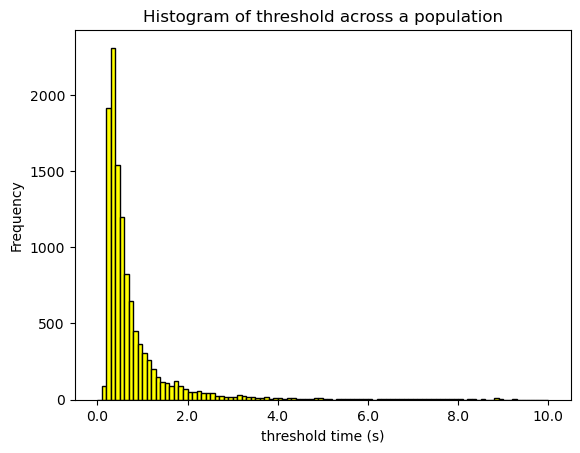

In [35]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

bin_range = (0, 1000)
# Create a histogram
plt.hist(thresholds, bins=100, range=bin_range, color='yellow', edgecolor='black')

# Add labels and title
plt.xlabel('threshold time (s)')
plt.ylabel('Frequency')
plt.title('Histogram of threshold across a population')

# plt.xlim(0, 100)

# Define a custom formatter to scale x-axis labels by a power of 1/1000
def format_func(value, tick_number):
    scaled_value = value / 100
    return f'{scaled_value:.1f}'

# Apply the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_func))

# Show the plot
plt.show()
